<a href="https://colab.research.google.com/github/Crisosth/IA/blob/main/Fuzzy_Smart_Storage_P1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=2ab109fc6022ddee5f80d701f587b885960badce96dd83773c46ebcf72a8c52c
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy



Classifique qual a temperatura [0-40]: 20

Classifique o nível de umidade [0-100]: 15

Validade:  20.0 %




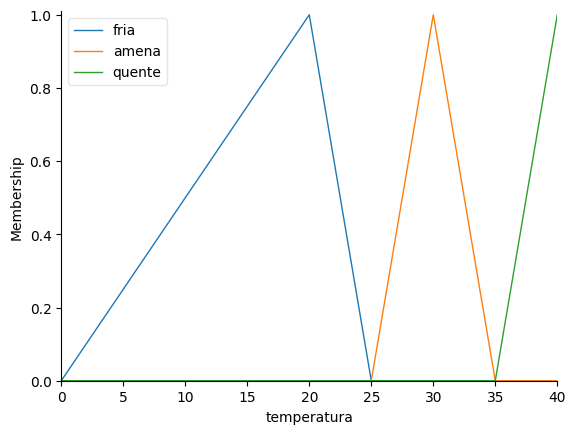

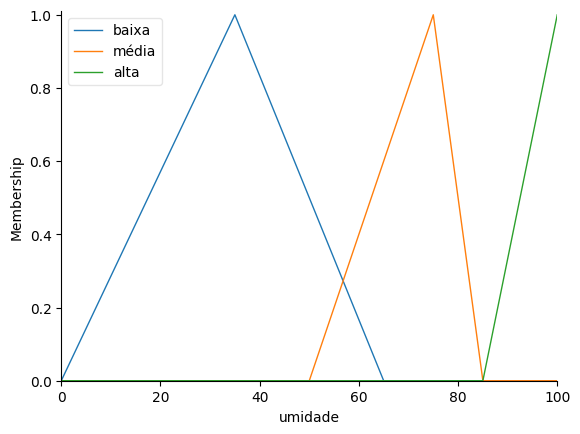

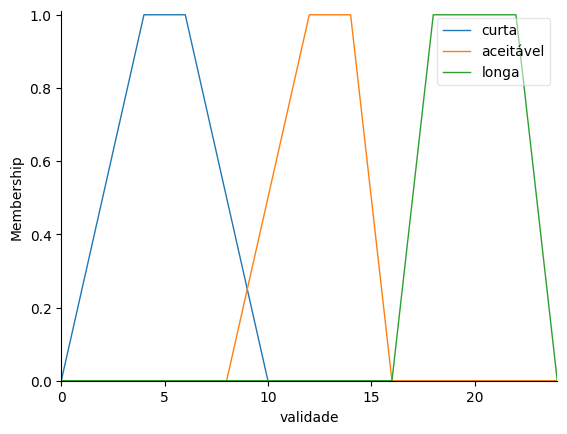

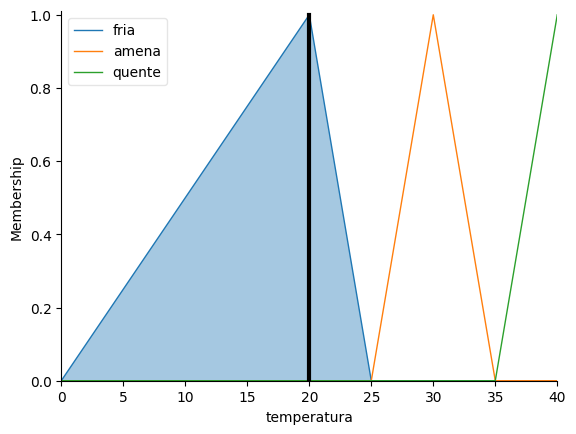

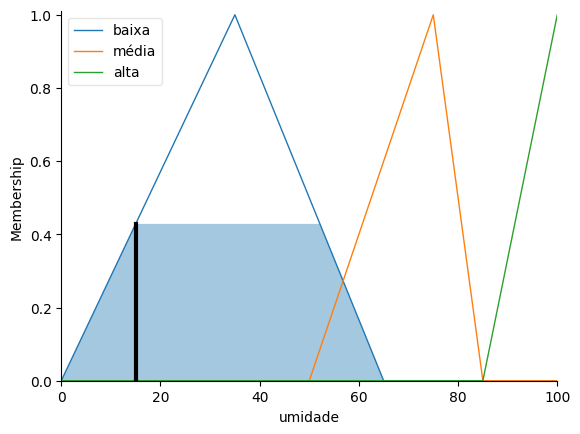

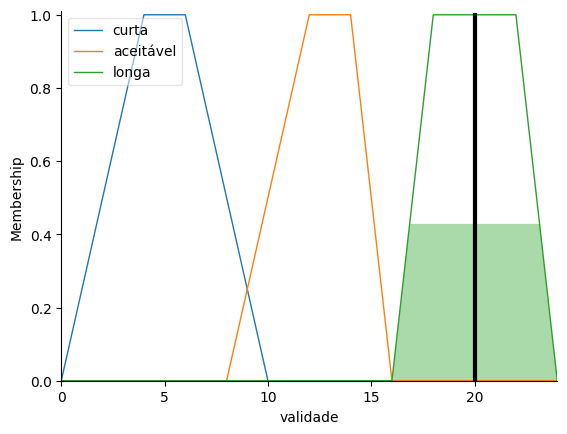

In [ ]:
#instalaçao das bibliotecas
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

#cria antecedentes -  variaveis de entrada
temperatura = ctrl.Antecedent(np.arange(0, 41, 1), 'temperatura') #valores de 0 a 40
umidade = ctrl.Antecedent(np.arange(0, 101, 1), 'umidade') #valores de 0 a 100

#cria consequente - variavel de saída
validade = ctrl.Consequent(np.arange(0, 25, 1), 'validade') #valores de 0 a 24

#Cria as funções de pertinencia:
#1) cria função de pertinencia automatica padrão triangular para comida
# faz o mapeamento automatico entre os valores numéricos e os difusos
temperatura['fria'] = fuzz.trimf(temperatura.universe, [0, 20, 25]) #função triangular
temperatura['amena'] = fuzz.trimf(temperatura.universe,[25, 30, 35]) #função triangular
temperatura['quente'] = fuzz.trimf(temperatura.universe,[35, 40, 40]) #função triangular

umidade['baixa'] = fuzz.trimf(umidade.universe, [0, 35, 65]) #função triangular
umidade['média'] = fuzz.trimf(umidade.universe,[50, 75, 85]) #função triangular
umidade['alta'] = fuzz.trimf(umidade.universe,[85, 100, 100]) #função triangular

validade['curta'] = fuzz.trapmf(validade.universe, [0, 4, 6, 10 ]) #função trapezoidal
validade['aceitável'] = fuzz.trapmf(validade.universe, [8, 12, 14, 16]) #função trapezoidal
validade['longa'] = fuzz.trapmf(validade.universe, [16, 18, 22, 24]) #função trapezoidal

#mostra graficamente as funções de pertinencia criadas
temperatura.view()
umidade.view()
validade.view()

#cria as regras de decisão difusas
rule1 = ctrl.Rule(umidade['baixa'] & temperatura['fria'], validade['longa'])
rule2 = ctrl.Rule(umidade['alta'] | temperatura['quente'], validade['curta'])
rule3 = ctrl.Rule(umidade['média'] , validade['aceitável'])
rule4 = ctrl.Rule(umidade['baixa'] & temperatura['amena'], validade['aceitável'])
rule5 = ctrl.Rule(umidade['média'] & temperatura['amena'], validade['curta'])
rule6 = ctrl.Rule(umidade['média'] & temperatura['fria'], validade['aceitável'])

#cria sistema fuzzy:

#1)cria a classe de controle do sistema fuzzy, usando as regras definidas
ControladorValidade = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])

#2)cria o objeto da classe Sistema fuzzy
SistemaValidade = ctrl.ControlSystemSimulation(ControladorValidade)

#entrada de dados no sistema fuzzy - Nota de qualidade da comida - fuzzificação
temperaturaGrau = input("\nClassifique qual a temperatura [0-40]: ")
SistemaValidade.input['temperatura'] = float(temperaturaGrau)

#entrada de dados no sistema fuzzy - Nota de qualidade do serviço - fuzzificação
umidadeNivel = input("\nClassifique o nível de umidade [0-100]: ")
SistemaValidade.input['umidade'] = float(umidadeNivel)

#Sistema fuzzy processa e defuzzifica o resultado da gorjeta
SistemaValidade.compute()

#Saida de dados do sistema fuzzy - defuzzificação
print("\nValidade: ", round(SistemaValidade.output['validade'], 2), "%\n\n")

#Mostra graficamente o resultado da simulação (Fuzzificação e Defuzzificação)
temperatura.view(sim=SistemaValidade)
umidade.view(sim=SistemaValidade)
validade.view(sim=SistemaValidade)